In [727]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [728]:
df = pd.read_csv('./DSA_features.csv')

In [730]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [731]:
df.shape

(9120, 272)

In [732]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

In [733]:
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

Text(0, 0.5, 'Count')

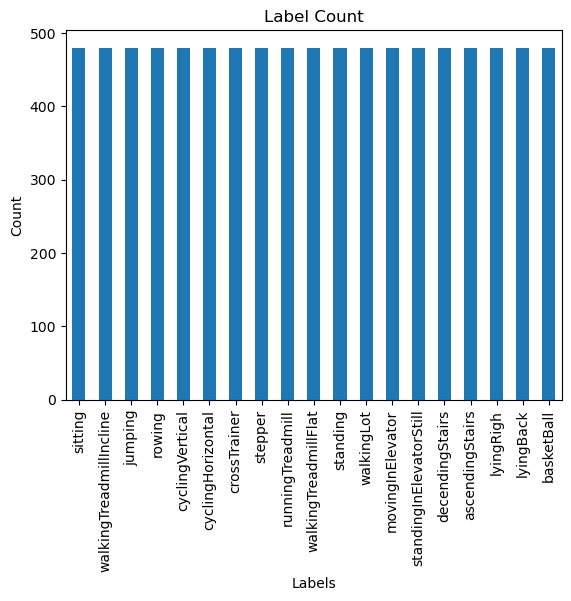

In [739]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['activity'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Label Count')
plt.xlabel('Labels')
plt.ylabel('Count')

In [741]:
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

T_xacc_mean     0
T_xacc_max      0
T_xacc_min      0
T_xacc_var      0
T_xacc_std      0
               ..
LL_zmag_var     0
LL_zmag_std     0
LL_zmag_skew    0
activity        0
people          0
Length: 272, dtype: int64

In [743]:
df.dtypes

T_xacc_mean     float64
T_xacc_max      float64
T_xacc_min      float64
T_xacc_var      float64
T_xacc_std      float64
                 ...   
LL_zmag_var     float64
LL_zmag_std     float64
LL_zmag_skew    float64
activity         object
people           object
Length: 272, dtype: object

In [745]:
df['people'].value_counts()

people
p1    1140
p2    1140
p3    1140
p4    1140
p5    1140
p6    1140
p7    1140
p8    1140
Name: count, dtype: int64

In [747]:
data = pd.get_dummies(df, columns=['people'], drop_first=True)
data.dtypes

T_xacc_mean    float64
T_xacc_max     float64
T_xacc_min     float64
T_xacc_var     float64
T_xacc_std     float64
                ...   
people_p4         bool
people_p5         bool
people_p6         bool
people_p7         bool
people_p8         bool
Length: 278, dtype: object

In [749]:
data['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [753]:
# LABELS = ["Normal", "Fraud"]

# activity_mapping = {
#     "lyingRigh": 0,
#     "lyingBack": 0,
#     "jumping": 1,
# }
# # activity 열을 해당 그룹으로 변환
# data['activity_group'] = data['activity'].map(activity_mapping)
# data = data.drop(['activity'], axis=1)
# data.head()

LABELS = ["Normal", "Fraud"]
activity_series = data['activity']

activity_mapping = {
    "lyingRigh": 0,
    "lyingBack": 0,
    "jumping": 1,
}
# activity 열을 해당 그룹으로 변환
# activity_series = activity_series.replace(activity_mapping)
activity_series = activity_series.replace(activity_mapping).where(activity_series.isin(activity_mapping.keys()) | activity_series.isin(activity_mapping.values()), np.nan)

# 변환한 activity 다시 삽입
data['activity']=activity_series
data

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_zmag_std,LL_zmag_skew,activity,people_p2,people_p3,people_p4,people_p5,people_p6,people_p7,people_p8
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000823,0.036729,NaN,False,False,False,False,False,False,False
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000839,0.347471,NaN,False,False,False,False,False,False,False
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000792,0.045579,NaN,False,False,False,False,False,False,False
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000895,0.240690,NaN,False,False,False,False,False,False,False
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000828,0.258429,NaN,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.203358,-0.310022,NaN,False,False,False,False,False,False,True
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.183186,-0.736410,NaN,False,False,False,False,False,False,True
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.142341,0.668438,NaN,False,False,False,False,False,False,True
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.116464,-1.482489,NaN,False,False,False,False,False,False,True


In [755]:
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

T_xacc_mean     0
T_xacc_max      0
T_xacc_min      0
T_xacc_var      0
T_xacc_std      0
               ..
LL_zmag_var     0
LL_zmag_std     0
LL_zmag_skew    0
activity        0
people          0
Length: 272, dtype: int64

In [757]:
data['activity'].value_counts()

activity
0    960
1    480
Name: count, dtype: int64

In [759]:
## 데이터타입 float 통일
data =data.astype('float32')
data.dtypes

T_xacc_mean    float32
T_xacc_max     float32
T_xacc_min     float32
T_xacc_var     float32
T_xacc_std     float32
                ...   
people_p4      float32
people_p5      float32
people_p6      float32
people_p7      float32
people_p8      float32
Length: 278, dtype: object

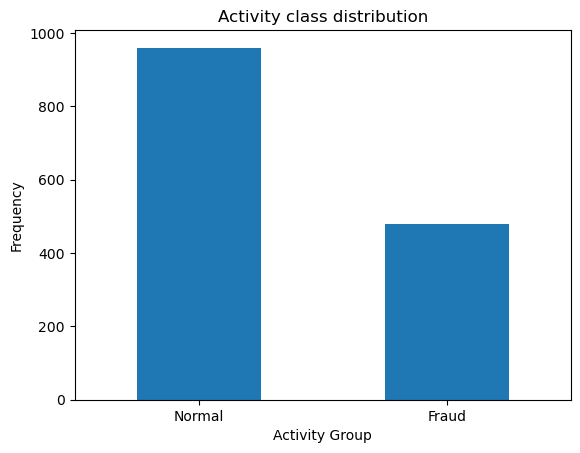

In [761]:
count_classes = data['activity'].value_counts(sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Activity class distribution")
plt.xticks(range(2), LABELS)  # LABELS의 키값으로 레이블 설정
plt.xlabel("Activity Group")
plt.ylabel("Frequency")
plt.show()

In [762]:
# LABELS = ["Normal", "Fraud"]
# activity_series = data['activity']

# activity_mapping = {
#     "lyingRigh": 0,
#     "lyingBack": 0,
#     "jumping": 1,
# }
# # activity 열을 해당 그룹으로 변환
# activity_series = activity_series.replace(activity_mapping)

# # 변환한 activity 다시 삽입
# data['activity']=activity_series

# 위의 코드에서 데이터 분류 완료

frauds = data[data.activity == 1]
normal = data[data.activity == 0]
print(frauds.shape)
print(normal.shape)

(480, 278)
(960, 278)


# train은 normal만 test는 섞어서

In [764]:
RANDOM_SEED = 42

In [777]:
# Normal 데이터를 50%로 나눠 트레인 및 테스트 세트 생성
X_train, Normal_test = train_test_split(normal, test_size=0.5, random_state=RANDOM_SEED)

# 학습용 X_train에서 'activity_group' 열 제거하고 특성만 남김
X_train = X_train.drop(['activity'], axis=1)

# 정상 테스트 세트와 사기 데이터를 테스트 세트에 합치기 (X, y 분리)
X_test = pd.concat([Normal_test.drop(['activity'], axis=1), frauds.drop(['activity'], axis=1)])

# 테스트 세트 레이블 합치기
y_test = pd.concat([Normal_test['activity'], frauds['activity']])

# 데이터 타입 확인
print(X_train.dtypes)

X_train = X_train.values
X_test = X_test.values
# 테스트 레이블을 남겨두는 이유는 나중에 정확도를 비교하기 위해서임
print(X_train.shape)
print(X_test.shape)

T_xacc_mean    float32
T_xacc_max     float32
T_xacc_min     float32
T_xacc_var     float32
T_xacc_std     float32
                ...   
people_p4      float32
people_p5      float32
people_p6      float32
people_p7      float32
people_p8      float32
Length: 277, dtype: object
(480, 277)
(960, 277)


In [779]:
# 오토인코더 모델

input_dim = X_train.shape[1] # 입력차원 설정
encoding_dim = 32  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
# 인코더
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
# 디코더 (이진 분류 문제에서 확률 값을 출력 sigmoid, 연속적인 값을 예측해야 하는 회귀 문제 linear)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [781]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=32, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 5.5368 - val_loss: 5.4133
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3885 - val_loss: 5.1843
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.1604 - val_loss: 4.9115
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9209 - val_loss: 4.7718
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8045 - val_loss: 4.7355
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7657 - val_loss: 4.7210
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7484 - val_loss: 4.6962
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7137 - val_loss: 4.6867
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7114 - val_loss: 4.6807
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6981 - val_loss: 4.6781
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6919 - val_loss: 4.6763
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6843 - val_l

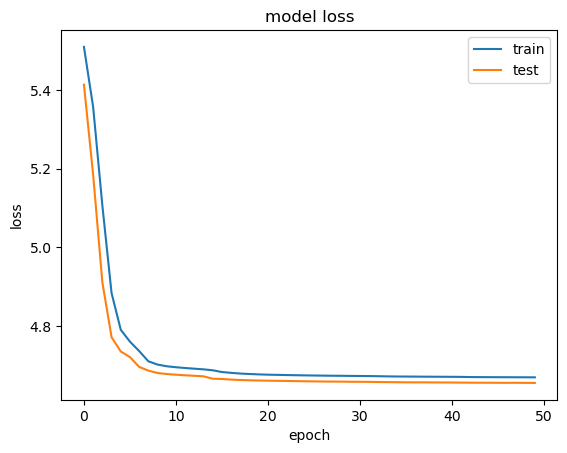

In [782]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [783]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,reconstruction_error,true_class
count,960.000000,960.000000
mean,254.127762,0.500000
std,390.475281,0.500261
min,4.380913,0.000000
25%,4.639391,0.000000
50%,32.175897,0.500000
75%,438.263107,1.000000
max,2856.581787,1.000000


In [787]:
error_df.head()

,reconstruction_error,true_class
1796,4.828308,0.0
1437,4.405404,0.0
1310,4.532643,0.0
1853,4.658918,0.0
1883,4.710821,0.0


In [789]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

# # 1. 통계적 방법으로 threshold 설정
# mean_error = error_df['reconstruction_error'].mean()
# std_error = error_df['reconstruction_error'].std()
# threshold_statistical = mean_error + 2 * std_error  # 평균 + 2배 표준편차
# print("Statistical Threshold:", threshold_statistical)

# # 2. 백분위수 기반 threshold 설정
# threshold_percentile = error_df['reconstruction_error'].quantile(0.95)  # 95% 백분위수
# print("Percentile Threshold:", threshold_percentile)

threshold = 30

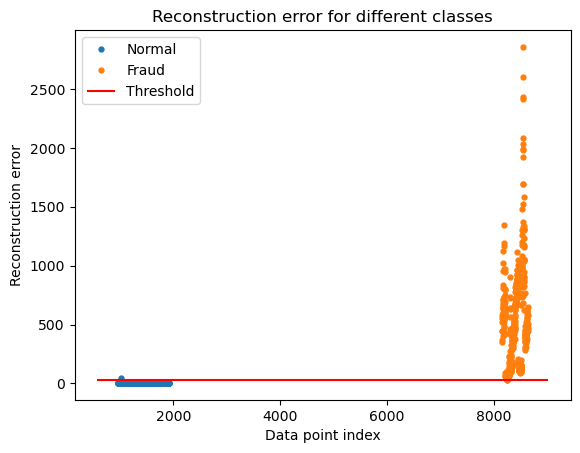

In [791]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

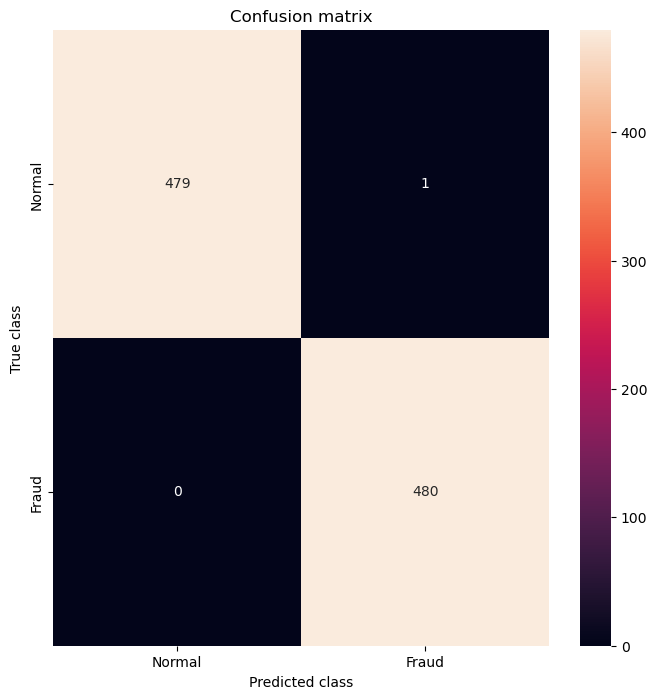

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       480
         1.0       1.00      1.00      1.00       480

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960



In [793]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))